In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import string


In [2]:
csv_file_path = './airbnb_dataset/data.csv'
df = pd.read_csv(csv_file_path)
pd.set_option('display.max_columns', None)
df.head()

,id,log_price,accommodates,bathrooms,description,host_response_rate,name,bedrooms,beds,cleaning_fee_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded
0,6901257,5.010635,3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",100.0,Beautiful brownstone 1-bedroom,1.0,1.0,1,1,1,0,4.760967,5.168581,4.796982,4.888112,4.721761
1,6304928,5.129899,7.0,1.0,Enjoy travelling during your stay in Manhattan...,100.0,Superb 3BR Apt Located Near Times Square,3.0,3.0,1,1,0,1,4.758486,5.170322,4.794964,4.888348,4.720492
2,7919400,4.976734,5.0,1.0,The Oasis comes complete with a full backyard ...,100.0,The Garden Oasis,1.0,3.0,1,1,1,1,4.758085,5.164081,4.791209,4.719628,4.717605
3,13418779,6.620073,4.0,1.0,This light-filled home-away-from-home is super...,100.0,Beautiful Flat in the Heart of SF!,2.0,2.0,1,1,1,0,4.799825,5.170322,4.794964,4.681690,5.172931
4,3808709,4.744932,2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100.0,Great studio in midtown DC,0.0,1.0,1,1,1,1,4.758986,5.166411,4.792550,4.716900,4.982195


In [3]:
# Load sentiment_dict from a created file
sentiment_dict = {}
with open('airbnb_dataset/tfidf_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        sentiment_dict[word] = float(theta)

In [4]:
name_dict = {}
with open('airbnb_dataset/name_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        name_dict[word] = float(theta)

In [5]:
punctuation = set(string.punctuation)

def sentiment(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += sentiment_dict.get(w, 0)
    return sentimentScore

In [6]:
def name(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += name_dict.get(w, 0)
    return sentimentScore

In [7]:
# Calculate each description's sentiment score
def des_sentiment(row):
    # This function will be applied to each row in the DataFrame
    if pd.notnull(row['description']):
        return sentiment(row['description'])
    else:
        return 0

def name_sentiment(row):
    if pd.notnull(row['description']):
        return name(row['description'])
    else:
        return 0
    
# Apply the function to each row
df['des_sentiment_analysis'] = df.apply(des_sentiment, axis=1)
df['name_sentiment_analysis'] = df.apply(name_sentiment, axis=1)


In [8]:
# Min-Max Nomarlization
cols_to_normalize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate',
    'property_type_encoded','room_type_encoded','bed_type_encoded','cancellation_policy_encoded','city_encoded'
]

df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].min()) / (df[cols_to_normalize].max() - df[cols_to_normalize].min())


df.shape, df[cols_to_normalize].head()

((73923, 20),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis  \
 0      0.133333      0.125       0.1  0.055556                0.546844   
 1      0.400000      0.125       0.3  0.166667                0.602953   
 2      0.266667      0.125       0.1  0.166667                0.600378   
 3      0.200000      0.125       0.2  0.111111                0.546608   
 4      0.066667      0.125       0.0  0.055556                0.518090   
 
    host_response_rate  property_type_encoded  room_type_encoded  \
 0                 1.0               0.572876           0.998679   
 1                 1.0               0.571692           1.000000   
 2                 1.0               0.571500           0.995266   
 3                 1.0               0.591425           1.000000   
 4                 1.0               0.571930           0.997033   
 
    bed_type_encoded  cancellation_policy_encoded  city_encoded  
 0          1.000000                     0.110344      0.1

In [9]:
# Standardlization 
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate',
    'property_type_encoded','room_type_encoded','bed_type_encoded','cancellation_policy_encoded','city_encoded']

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.shape, df[columns_to_standardize].head()

((73923, 20),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis  \
 0     -0.072621  -0.404046 -0.312048 -0.566461                0.216242   
 1      1.783653  -0.404046  2.034955  1.027816                0.837002   
 2      0.855516  -0.404046 -0.312048  1.027816                0.808508   
 3      0.391448  -0.404046  0.861454  0.230678                0.213627   
 4     -0.536689  -0.404046 -1.485549 -0.566461               -0.101872   
 
    host_response_rate  property_type_encoded  room_type_encoded  \
 0            0.296013              -0.221989           0.879947   
 1            0.296013              -0.248121           0.883912   
 2            0.296013              -0.252342           0.869698   
 3            0.296013               0.187295           0.883912   
 4            0.296013              -0.242856           0.875005   
 
    bed_type_encoded  cancellation_policy_encoded  city_encoded  
 0          0.206922                     1.031946     -0.4

In [10]:
df.drop(['description'], axis=1, inplace=True)

In [11]:
df.head()

,id,log_price,accommodates,bathrooms,host_response_rate,name,bedrooms,beds,cleaning_fee_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded,des_sentiment_analysis,name_sentiment_analysis
0,6901257,5.010635,-0.072621,-0.404046,0.296013,Beautiful brownstone 1-bedroom,-0.312048,-0.566461,1,1,1,0,-0.221989,0.879947,0.206922,1.031946,-0.417068,0.216242,-0.435248
1,6304928,5.129899,1.783653,-0.404046,0.296013,Superb 3BR Apt Located Near Times Square,2.034955,1.027816,1,1,0,1,-0.248121,0.883912,0.178912,1.034251,-0.425829,0.837002,-1.788095
2,7919400,4.976734,0.855516,-0.404046,0.296013,The Garden Oasis,-0.312048,1.027816,1,1,1,1,-0.252342,0.869698,0.126796,-0.607644,-0.445747,0.808508,-0.133695
3,13418779,6.620073,0.391448,-0.404046,0.296013,Beautiful Flat in the Heart of SF!,0.861454,0.230678,1,1,1,0,0.187295,0.883912,0.178912,-0.976832,2.696289,0.213627,-0.926212
4,3808709,4.744932,-0.536689,-0.404046,0.296013,Great studio in midtown DC,-1.485549,-0.566461,1,1,1,1,-0.242856,0.875005,0.145414,-0.634193,1.380088,-0.101872,-0.095776


In [12]:
print("Min:", np.min(df['log_price']))
print("Max:", np.max(df['log_price']))

Min: 0.0
Max: 7.6004023345004


In [13]:
df = df[df['log_price'] != 0.0]
X = df.drop(['log_price', 'id', 'name'], axis=1)  
y = df['log_price']

2nd Polynomial Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import plotly.express as px


In [15]:
features = [col for col in df.columns if col != 'log_price' and df[col].dtype in ['int64', 'float64']]
X = df[features]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Plot the truth vs prediction
def plot_truth_vs_pred(df_plot,degree):
  # plot all the datas
  fig = px.scatter(df_plot, x='ground truth', y='Predicted', title=f'Truth vs Prediction (Degree {degree})')

  cof = np.polyfit(df_plot['ground truth'], df_plot['Predicted'], degree)
  poly = np.poly1d(cof)
  x_values = np.linspace(df_plot['ground truth'].min(), df_plot['ground truth'].max(), 100)
  fitted_y_values = poly(x_values)

  # Add the y = x line
  fig.add_trace(go.Scatter(x=df_plot['ground truth'], y=df_plot['ground truth'], mode='lines', name='ground truth line', line=dict(color='firebrick', width=2)))

  # Add the polynomial fit line
  if degree > 1:
      fig.add_trace(go.Scatter(x=x_values, y=fitted_y_values, mode='lines', name=f'Polynomial Fit Degree {degree}', line=dict(color='royalblue', width=2)))

  fig.update_layout(title='Polynomial Fit According to Degree', xaxis_title='Ground Truth', yaxis_title='Predicted')
  fig.show()

  
# Plot the residuals
def plot_residuals(df_plot, save = False):
  plt.figure(figsize=(10, 6))
  
  # Plot the residuals
  sns.scatterplot(x='Predicted', y='Residuals', data=df_plot, alpha=0.5)
  
  plt.title('Sampled Residuals vs. Predicted Values')
  plt.xlabel('Predicted Values')
  plt.ylabel('Sampled Residuals')
  
  # Add a horizontal line at y = 0
  plt.axhline(y=0, color='red', linestyle='--') 
  
  
  if save:
    plt.savefig('graphs/residuals.png')
    
    
  plt.show()
  
  
def plot_regression(df_plot, degree,save = False):
  # Plot the truth vs prediction
  sns.regplot(data=df_plot, x='ground truth', y='ground truth', order = degree, ci = None, line_kws=dict(color="orange"), label ='Perfect Fit', scatter_kws={'alpha':0.5}, scatter=False)
  # Plot the polynomial fit
  sns.regplot(data=df_plot, x='ground truth', y='Predicted', order = degree, ci = 99, color='blue', line_kws=dict(color="r",label='Predictions'), scatter_kws={'alpha':0.5})
  
  plt.legend()
  
  if save:
    plt.savefig('graphs/regression.png')



# Plot the graphs
def plot_graphs(y_test, yhat_test, degree = 1,save = False):
  df_plot = pd.DataFrame({'ground truth':y_test, 'Predicted': yhat_test, 'Residuals': y_test-yhat_test})
  df_plot = df_plot[np.abs(df_plot['Residuals']) < 0.9 * np.max(np.abs(df_plot['Residuals']))]
  df_sample = df_plot.sample(frac=0.1,random_state=42)
  

  plot_truth_vs_pred(df_sample,degree)   # plotply version, cannot show in github
  plot_residuals(df_sample, save =save)
  plot_regression(df_sample, degree, save =save)

In [18]:
degree=2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 score: {r2}')

MSE: 0.20110337007355877
R2 score: 0.6171707339119377


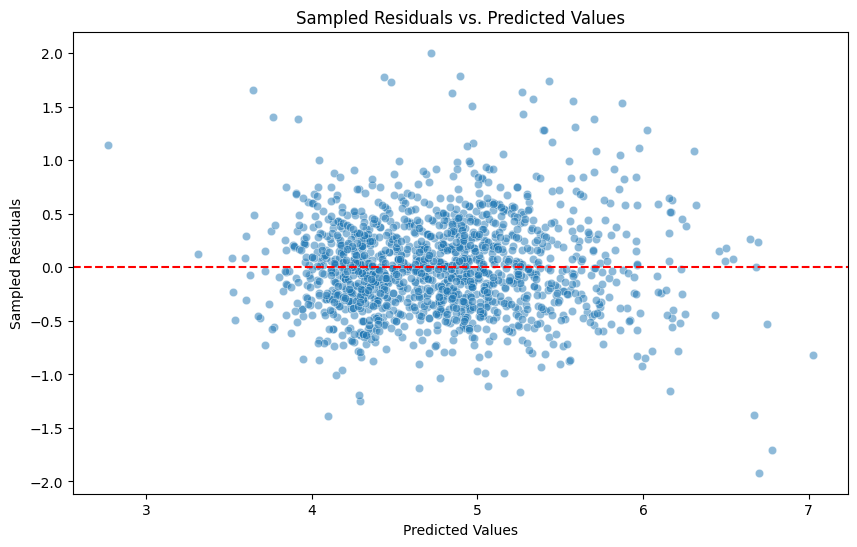

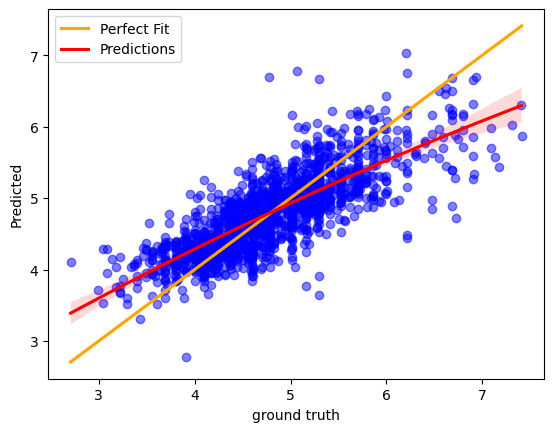

In [19]:
plot_graphs(y_test, y_pred, degree, save = True)

In [20]:
df=df.drop(['id', 'name'], axis=1)  

In [21]:
csv_file_path = './airbnb_dataset/milestone3.csv'
df.to_csv(csv_file_path, index=False)